In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [3]:
dir = '/home/kevin/Documents/M8/object'
fitspath = dir + '/H170524object117_chihiro.fits'
with fits.open(fitspath) as hdul:
    hdr = hdul[0].header.copy()
    data = hdul[0].data.copy()

In [4]:
nchan = 4

x_oscan = np.array([[hdr['S_OSMN'+str(i+1)+'1'], hdr['S_OSMX'+str(i+1)+'1']]for i in range(nchan)])
y_oscan = np.array([[hdr['S_OSMN'+str(i+1)+'2'], hdr['S_OSMX'+str(i+1)+'2']]for i in range(nchan)])

In [5]:
x_oscan, y_oscan

(array([[ 521,  568],
        [ 569,  616],
        [1657, 1704],
        [1705, 1752]]),
 array([[ 1, 48],
        [ 1, 48],
        [ 1, 48],
        [ 1, 48]]))

In [6]:
x_oscan[:,1]-x_oscan[:,0]+1

array([48, 48, 48, 48])

In [7]:
x_eff = np.array([[hdr['S_EFMN'+str(i+1)+'1'], hdr['S_EFMX'+str(i+1)+'1']]for i in range(nchan)])
y_eff = np.array([[hdr['S_EFMN'+str(i+1)+'2'], hdr['S_EFMX'+str(i+1)+'2']]for i in range(nchan)])

In [8]:
x_eff, y_eff

(array([[   9,  520],
        [ 617, 1128],
        [1145, 1656],
        [1753, 2264]]),
 array([[  49, 4225],
        [  49, 4225],
        [  49, 4225],
        [  49, 4225]]))

In [9]:
hdr['NAXIS1'], hdr['NAXIS2']

(2272, 4273)

In [10]:
hdr['S_XFLIP']

False

In [29]:
def get_channel_info(fitspath):
    with fits.open(fitspath) as hdul:
        hdr = hdul[0].header.copy()
        data = hdul[0].data.copy()

    nchan = 4

    x_oscan = np.array([[hdr['S_OSMN'+str(i+1)+'1'], hdr['S_OSMX'+str(i+1)+'1']]for i in range(nchan)])
    x_eff = np.array([[hdr['S_EFMN'+str(i+1)+'1'], hdr['S_EFMX'+str(i+1)+'1']]for i in range(nchan)])
    y_oscan = np.array([[hdr['S_OSMN'+str(i+1)+'2'], hdr['S_OSMX'+str(i+1)+'2']]for i in range(nchan)])    
    y_eff = np.array([[hdr['S_EFMN'+str(i+1)+'2'], hdr['S_EFMX'+str(i+1)+'2']]for i in range(nchan)])

    frame_pos = hdr['S_FRMPOS']

    chan_info={'detector':hdr['DETECTOR'], 'chip_id': hdr['DET-ID'],
               'frame_pos':frame_pos, 'frame_row':int(frame_pos[2:]), 'frame_col':int(frame_pos[:2]),
               'xflip':hdr['S_XFLIP'], 'x_oscan':x_oscan, 'x_eff':x_eff,
               'yflip':hdr['S_YFLIP'], 'y_oscan':y_oscan, 'y_eff':y_eff,
               'NAXIS1': hdr['NAXIS1'], 'NAXIS2':hdr['NAXIS2'], 'image_shape':data.shape,
               'CRPIX1': hdr['CRPIX1'], 'CRPIX2':hdr['CRPIX2'], 'CRVAL1':hdr['CRVAL1'], 'CRVAL2':hdr['CRVAL2']}
    
    return chan_info

In [30]:
detectors = ['chihiro', 'clarisse', 'fio','kiki','nausicaa',
             'ponyo','san','satsuki','sheeta','sophie']

In [31]:
dir = '/home/kevin/Documents/M8/object'
chan_info = {}
for det in detectors:
    fitspath = dir + '/H170524object117_'+det+'.fits'
    chan_info[det] = get_channel_info(fitspath)

In [14]:
import pandas as pd

In [47]:
cols = ['detector', 'chip_id', 'frame_row', 'frame_col', 'xflip', 'yflip',
        'NAXIS1', 'NAXIS2',
        'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2']
chan_info_df = pd.DataFrame([[chan_info[det][c] for c in cols] for det in chan_info], columns=cols)

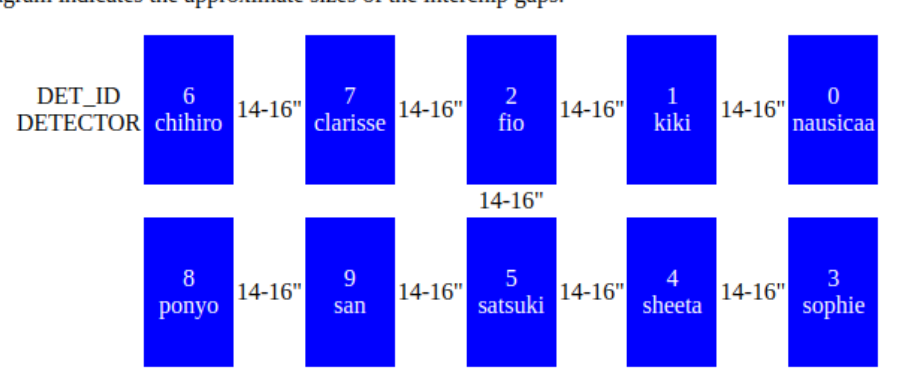

In [48]:
chan_info_df.sort_values(['frame_row', 'frame_col'])

,detector,chip_id,frame_row,frame_col,xflip,yflip,NAXIS1,NAXIS2,CRPIX1,CRPIX2,CRVAL1,CRVAL2
5,ponyo,8,0,0,True,False,2272,4273,5252.0,4213.0,270.90375,-24.386653
6,san,9,0,1,True,False,2272,4273,3162.0,4212.0,270.90375,-24.386653
7,satsuki,5,0,2,True,False,2272,4273,1055.0,4214.0,270.90375,-24.386653
8,sheeta,4,0,3,True,False,2272,4273,-1068.0,4189.0,270.90375,-24.386653
9,sophie,3,0,4,True,False,2272,4273,-3153.0,4167.0,270.90375,-24.386653
0,chihiro,6,1,0,False,True,2272,4273,5276.0,25.0,270.90375,-24.386653
1,clarisse,7,1,1,False,True,2272,4273,3184.0,-14.0,270.90375,-24.386653
2,fio,2,1,2,False,True,2272,4273,1068.0,-40.0,270.90375,-24.386653
3,kiki,1,1,3,False,True,2272,4273,-1032.0,-38.0,270.90375,-24.386653
4,nausicaa,0,1,4,False,True,2272,4273,-3130.0,-37.0,270.90375,-24.386653


In [35]:
dir = '/home/kevin/Documents/M8/object'
chan_info_oscansub= {}
for det in detectors:
    fitspath = dir + '/To_RH170524object117_'+det+'.fits'
    chan_info_oscansub[det] = get_channel_info(fitspath)

In [40]:
cols = ['detector', 'chip_id', 'frame_row', 'frame_col', 'xflip', 'yflip',
        'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2']
chan_info_oscansub_df = pd.DataFrame([[chan_info_oscansub[det][c] for c in cols] for det in chan_info_oscansub], columns=cols)

In [41]:
chan_info_oscansub_df

,detector,chip_id,frame_row,frame_col,xflip,yflip,CRPIX1,CRPIX2,CRVAL1,CRVAL2
0,chihiro,6,1,0,False,True,5268.0,-23.0,270.90375,-24.386653
1,clarisse,7,1,1,False,True,3176.0,-62.0,270.90375,-24.386653
2,fio,2,1,2,False,True,1060.0,-88.0,270.90375,-24.386653
3,kiki,1,1,3,False,True,-1040.0,-86.0,270.90375,-24.386653
4,nausicaa,0,1,4,False,True,-3138.0,-85.0,270.90375,-24.386653
5,ponyo,8,0,0,True,False,5244.0,4165.0,270.90375,-24.386653
6,san,9,0,1,True,False,3154.0,4164.0,270.90375,-24.386653
7,satsuki,5,0,2,True,False,1047.0,4166.0,270.90375,-24.386653
8,sheeta,4,0,3,True,False,-1076.0,4141.0,270.90375,-24.386653
9,sophie,3,0,4,True,False,-3161.0,4119.0,270.90375,-24.386653


In [38]:
chan_info_oscansub_df.CRPIX1 - chan_info_df.CRPIX1

0   -8.0
1   -8.0
2   -8.0
3   -8.0
4   -8.0
5   -8.0
6   -8.0
7   -8.0
8   -8.0
9   -8.0
Name: CRPIX1, dtype: float64

In [39]:
chan_info_oscansub_df.CRPIX2 - chan_info_df.CRPIX2

0   -48.0
1   -48.0
2   -48.0
3   -48.0
4   -48.0
5   -48.0
6   -48.0
7   -48.0
8   -48.0
9   -48.0
Name: CRPIX2, dtype: float64

In [52]:
fld = 'x_eff'
for det in detectors:
    print(f'----------------- {det} -----------------')

    print(f'before: {chan_info[det][fld].T}')
    print(f'after: {chan_info_oscansub[det][fld].T}')
    print()


----------------- chihiro -----------------
before: [[   9  617 1145 1753]
 [ 520 1128 1656 2264]]
after: [[   1  513 1025 1537]
 [ 512 1024 1536 2048]]

----------------- clarisse -----------------
before: [[   9  617 1145 1753]
 [ 520 1128 1656 2264]]
after: [[   1  513 1025 1537]
 [ 512 1024 1536 2048]]

----------------- fio -----------------
before: [[   9  617 1145 1753]
 [ 520 1128 1656 2264]]
after: [[   1  513 1025 1537]
 [ 512 1024 1536 2048]]

----------------- kiki -----------------
before: [[   9  617 1145 1753]
 [ 520 1128 1656 2264]]
after: [[   1  513 1025 1537]
 [ 512 1024 1536 2048]]

----------------- nausicaa -----------------
before: [[   9  617 1145 1753]
 [ 520 1128 1656 2264]]
after: [[   1  513 1025 1537]
 [ 512 1024 1536 2048]]

----------------- ponyo -----------------
before: [[1753 1145  617    9]
 [2264 1656 1128  520]]
after: [[1537 1025  513    1]
 [2048 1536 1024  512]]

----------------- san -----------------
before: [[1753 1145  617    9]
 [2264 1656 

In [45]:
for det in detectors:
    yflip = chan_info[det]['yflip']
    print(f'Detector: {det}, yflip: {yflip}')
    print(chan_info[det]['y_eff'].T)
    print()

Detector: chihiro, yflip: True
[[  49   49   49   49]
 [4225 4225 4225 4225]]

Detector: clarisse, yflip: True
[[  49   49   49   49]
 [4225 4225 4225 4225]]

Detector: fio, yflip: True
[[  49   49   49   49]
 [4225 4225 4225 4225]]

Detector: kiki, yflip: True
[[  49   49   49   49]
 [4225 4225 4225 4225]]

Detector: nausicaa, yflip: True
[[  49   49   49   49]
 [4225 4225 4225 4225]]

Detector: ponyo, yflip: False
[[  49   49   49   49]
 [4225 4225 4225 4225]]

Detector: san, yflip: False
[[  49   49   49   49]
 [4225 4225 4225 4225]]

Detector: satsuki, yflip: False
[[  49   49   49   49]
 [4225 4225 4225 4225]]

Detector: sheeta, yflip: False
[[  49   49   49   49]
 [4225 4225 4225 4225]]

Detector: sophie, yflip: False
[[  49   49   49   49]
 [4225 4225 4225 4225]]



In [46]:
for det in detectors:
    xflip = chan_info[det]['xflip']
    print(f'Detector: {det}, xflip: {xflip}')
    print(chan_info[det]['x_eff'].T)
    print()

Detector: chihiro, xflip: False
[[   9  617 1145 1753]
 [ 520 1128 1656 2264]]

Detector: clarisse, xflip: False
[[   9  617 1145 1753]
 [ 520 1128 1656 2264]]

Detector: fio, xflip: False
[[   9  617 1145 1753]
 [ 520 1128 1656 2264]]

Detector: kiki, xflip: False
[[   9  617 1145 1753]
 [ 520 1128 1656 2264]]

Detector: nausicaa, xflip: False
[[   9  617 1145 1753]
 [ 520 1128 1656 2264]]

Detector: ponyo, xflip: True
[[1753 1145  617    9]
 [2264 1656 1128  520]]

Detector: san, xflip: True
[[1753 1145  617    9]
 [2264 1656 1128  520]]

Detector: satsuki, xflip: True
[[1753 1145  617    9]
 [2264 1656 1128  520]]

Detector: sheeta, xflip: True
[[1753 1145  617    9]
 [2264 1656 1128  520]]

Detector: sophie, xflip: True
[[1753 1145  617    9]
 [2264 1656 1128  520]]



In [19]:
chan_info_oscansub['nausicaa']['image_shape'],chan_info['nausicaa']['image_shape']

((4177, 2048), (4273, 2272))

In [26]:
(chan_info['nausicaa']['x_eff'][:,1]-chan_info['nausicaa']['x_eff'][:,0]+1).sum()

2048

In [28]:
(chan_info['nausicaa']['y_eff'][:,1]-chan_info['nausicaa']['y_eff'][:,0]+1).sum()/4

4177.0

In [55]:
det='sheeta'
x_eff = chan_info['sheeta']['x_eff']
x_effcols = np.concatenate([np.arange(x_eff[c,0],x_eff[c,1]+1)  for c in range(4)])

In [59]:
x_effcols.sort()
x_effcols

array([   9,   10,   11, ..., 2262, 2263, 2264])